# Test figures

In [1]:
import torch
import matplotlib
matplotlib.rcParams.update({'font.size': 11})

import matplotlib.pyplot as plt
from pathlib import Path


datapath = Path('./data/').expanduser()
loaded = torch.load(datapath/'torch_test')
loaded1 = torch.load(datapath/'LinlogJ.pt')
Outputs = loaded['Outputs']
Ns_span = loaded['Ns_span']
rho_span = loaded['rho_span']
Nr = loaded['Nr']
num_try = Outputs.size(dim = 1)

Jnewout = loaded1['Jnewout']

## $GC^\top$ related plots

All data points

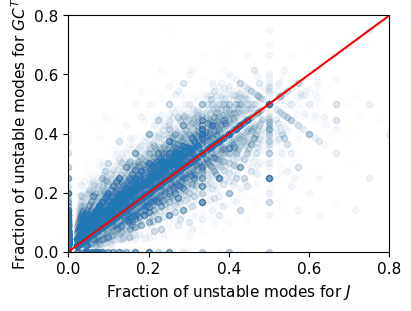

In [2]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Outputs[0],Outputs[1], alpha=.01, s=20)
plt.plot(torch.linspace(.0,.8, steps=100),torch.linspace(.0,.8, steps=100),'r')

plt.xlim(.0,.8)
plt.ylim(.0,.8)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

plt.savefig('./figures/J_GC1.png', format='png', dpi=300)

For the Linear supply

Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

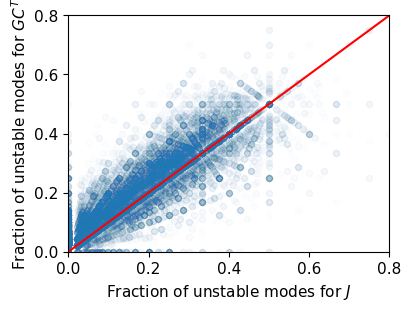

In [3]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Jnewout[0],Outputs[1], alpha=.01, s=20)
plt.plot(torch.linspace(.0,.8, steps=100),torch.linspace(.0,.8, steps=100),'r')

plt.xlim(.0,.8)
plt.ylim(.0,.8)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

For the logistic supply

Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

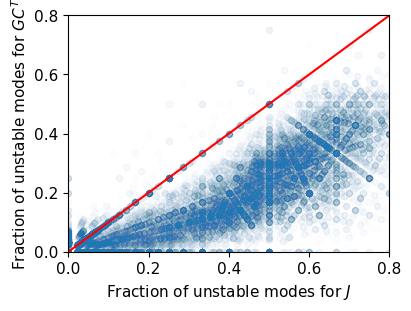

In [4]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Jnewout[1],Outputs[1], alpha=.01, s=20)
plt.plot(torch.linspace(.0,.8, steps=100),torch.linspace(.0,.8, steps=100),'r')

plt.xlim(.0,.8)
plt.ylim(.0,.8)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

Averaged over all fixed points samples

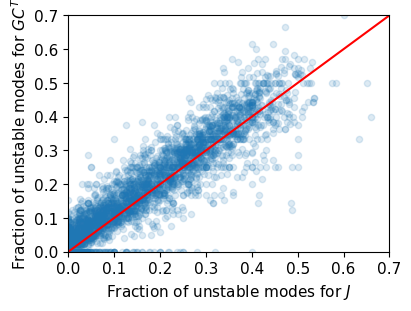

In [5]:
mean_FU_J = torch.mean(Outputs[0],0)
mean_FU_GC = torch.mean(Outputs[1],0)

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(mean_FU_J,mean_FU_GC, alpha=.15, s=20)

plt.plot(torch.linspace(.0,.7, steps=100),torch.linspace(.0,.7, steps=100),'r')

plt.xlim(.0,.7)
plt.ylim(.0,.7)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')
plt.savefig('./figures/J_GC2.png', format='png', dpi=300)

For linear resource supply

Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

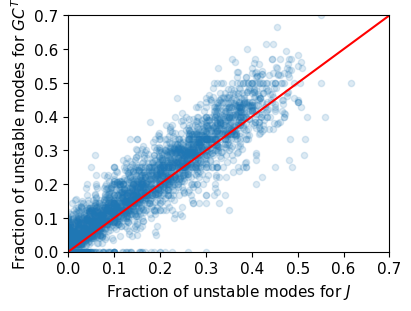

In [6]:
mean_FU_JLin = torch.mean(Jnewout[0],0)
mean_FU_GCLin = torch.mean(Outputs[1],0)

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(mean_FU_JLin,mean_FU_GCLin, alpha=.15, s=20)

plt.plot(torch.linspace(.0,.7, steps=100),torch.linspace(.0,.7, steps=100),'r')

plt.xlim(.0,.7)
plt.ylim(.0,.7)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

For logistic resource supply

Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

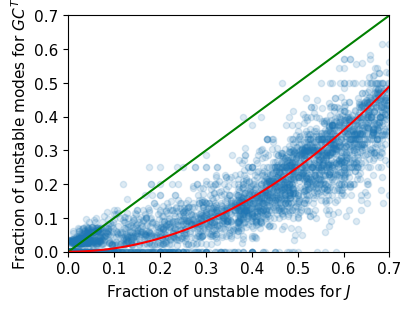

In [7]:
mean_FU_JLog = torch.mean(Jnewout[1],0)
mean_FU_GCLog = torch.mean(Outputs[1],0)

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(mean_FU_JLog,mean_FU_GCLog, alpha=.15, s=20)

plt.plot(torch.linspace(.0,.7, steps=100),torch.linspace(.0,.7, steps=100),'g')
plt.plot(torch.linspace(.0,.7, steps=100),torch.linspace(.0,.7, steps=100)**2,'r')

plt.xlim(.0,.7)
plt.ylim(.0,.7)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

All averaged

In [8]:
import math

In [9]:
x0_mean = []
y0_mean = []
x0_std = []
y0_std = []


for i in range(12):
    indeces = ((i*0.05<=mean_FU_J) & (mean_FU_J<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_J[indeces]
    y_group = mean_FU_GC[indeces]
    if x_group.size() != torch.Size([0]):
        x0_mean.append(torch.mean(x_group))
        x0_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y0_mean.append(torch.mean(y_group))
        y0_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))


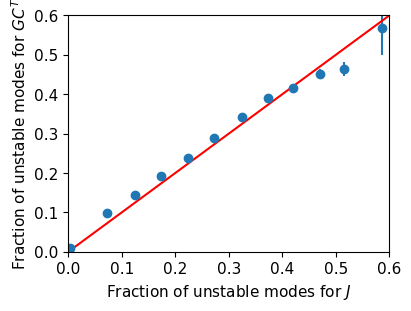

In [10]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x0_mean,y0_mean, xerr=x0_std, yerr= y0_std, marker = 'o', ls='none')
plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100),'r')

plt.xlim(.0,.6)
plt.ylim(.0,.6)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')
plt.savefig('./figures/J_GC3.eps', format='eps')

For linear resource supply

In [11]:
x1_mean = []
y1_mean = []
x1_std = []
y1_std = []

for i in range(12):
    indeces = ((i*0.05<=mean_FU_JLin) & (mean_FU_JLin<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_JLin[indeces]
    y_group = mean_FU_GCLin[indeces]
    if x_group.size() != torch.Size([0]):
        x1_mean.append(torch.mean(x_group))
        x1_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y1_mean.append(torch.mean(y_group))
        y1_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))


Text(0, 0.5, 'Fraction of unstable modes for $GC^T$')

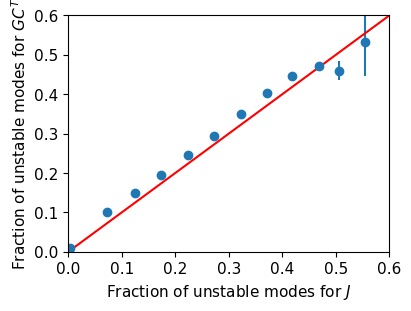

In [12]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x1_mean,y1_mean, xerr=x1_std, yerr= y1_std, marker = 'o', ls='none')
plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100),'r')

plt.xlim(.0,.6)
plt.ylim(.0,.6)
plt.xlabel('Fraction of unstable modes for $J$')
plt.ylabel('Fraction of unstable modes for $GC^T$')

For logistic resource supply

In [13]:
x2_mean = []
y2_mean = []
x2_std = []
y2_std = []

for i in range(12):
    indeces = ((i*0.05<=mean_FU_JLog) & (mean_FU_JLog<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = mean_FU_JLog[indeces]
    y_group = mean_FU_GCLog[indeces]
    if x_group.size() != torch.Size([0]):
        x2_mean.append(torch.mean(x_group))
        x2_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        y2_mean.append(torch.mean(y_group))
        y2_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


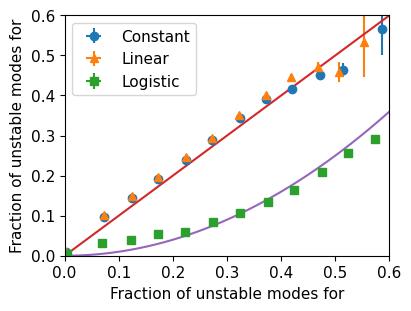

In [14]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x0_mean,y0_mean, xerr=x0_std, yerr= y0_std, marker = 'o', ls='none')
plt.errorbar(x1_mean,y1_mean, xerr=x1_std, yerr= y1_std, marker = '^', ls='none')
plt.errorbar(x2_mean,y2_mean, xerr=x2_std, yerr= y2_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100))
plt.plot(torch.linspace(.0,.6, steps=100),torch.linspace(.0,.6, steps=100)**2)

plt.xlim(.0,.6)
plt.ylim(.0,.6)
plt.xlabel('Fraction of unstable modes for') #$J$
plt.ylabel('Fraction of unstable modes for') #$GC^T$

#plt.savefig('./figures/J_GC_allsupp.eps', format='eps')

## $J$ and $E(G,C)$

Text(0, 0.5, 'Fraction of unstable modes for $J$')

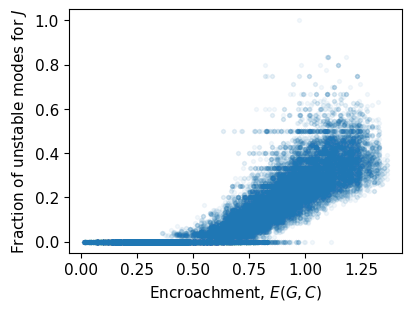

In [15]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Outputs[2],Outputs[0], s=8, alpha=0.05) # x: E; y: unstable mode fraction

plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of unstable modes for $J$')

In [16]:
x_mean = []
umJ_mean = []
x_std = []
umJ_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = Outputs[0][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_mean.append(torch.mean(y_group))
        umJ_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable modes of $J$')

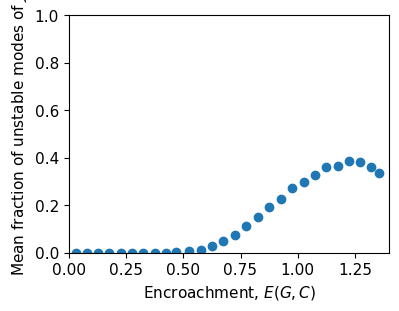

In [17]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,umJ_mean, xerr=x_std, yerr= umJ_std, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable modes of $J$')

Linear supply

In [18]:
x_mean = []
umJ_meanLi = []
x_std = []
umJ_stdLi = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = Jnewout[0][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_meanLi.append(torch.mean(y_group))
        umJ_stdLi.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable modes of $J$')

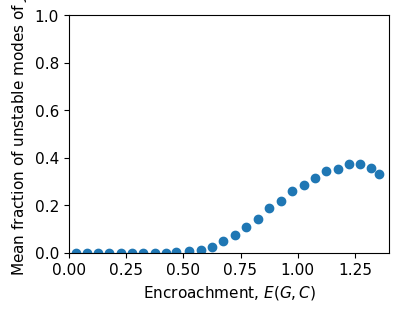

In [19]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,umJ_meanLi, xerr=x_std, yerr= umJ_stdLi, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable modes of $J$')

Logistic growth

In [20]:
x_mean = []
umJ_meanLo = []
x_std = []
umJ_stdLo = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = Jnewout[1][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        umJ_meanLo.append(torch.mean(y_group))
        umJ_stdLo.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of unstable modes of $J$')

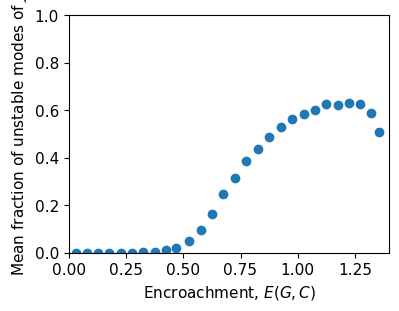

In [21]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,umJ_meanLo, xerr=x_std, yerr= umJ_stdLo, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of unstable modes of $J$')

Put together

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


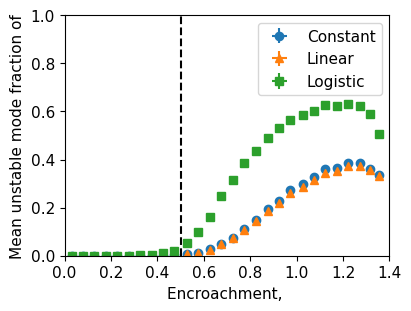

In [22]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,umJ_mean, xerr=x_std, yerr= umJ_std, marker = 'o', ls='none')
plt.errorbar(x_mean,umJ_meanLi, xerr=x_std, yerr= umJ_stdLi, marker = '^', ls='none')
plt.errorbar(x_mean,umJ_meanLo, xerr=x_std, yerr= umJ_stdLo, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(.5,.5, steps=100),torch.linspace(.0,1.0, steps=100),'--k')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, ') #$E(G,C)$
plt.ylabel('Mean unstable mode fraction of') #$J$

plt.savefig('./figures/UmodesvsE.eps', format='eps')

## Unstable fraction

All data points

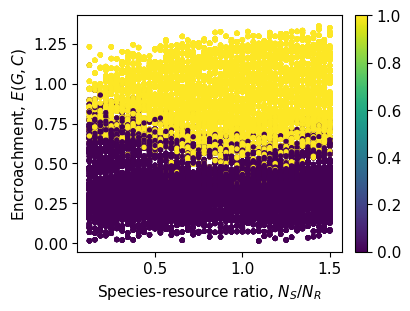

In [23]:
NsNr = torch.ones(num_try,len(Ns_span),len(rho_span)) * (torch.tensor(Ns_span).view(1,len(Ns_span)).transpose(0,1) * torch.ones(1,len(rho_span)))/Nr
unstable = (Outputs[0] > 0).float()
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=unstable, s=8) # try to plot something like the fraction of unstable states (inside one pixel)
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/E_raw.png', format='png', dpi=300)

Heat map

In [24]:
heat_value = torch.zeros(28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(unstable.size(dim=1)):
    for j in range(unstable.size(dim=2)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_value[ii,jj] = (num_point[ii,jj]*heat_value[ii,jj] + unstable[k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1


Text(0, 0.5, 'Encroachment, $E(G,C)$')

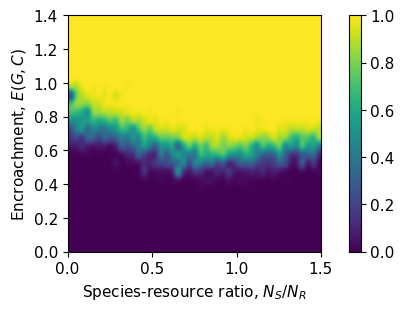

In [25]:
heat_value[:8,:] = torch.ones(heat_value[:8,:].size())
heat_value[8,len(Ns_span)-1] = 1

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_value, extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
# plt.savefig('./figures/E_heat.eps', format='eps')

vs $(G,C)$

In [26]:
x_mean = []
uf_mean = []
x_std = []
uf_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = unstable[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        uf_mean.append(torch.mean(y_group))
        uf_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of unstable communities')

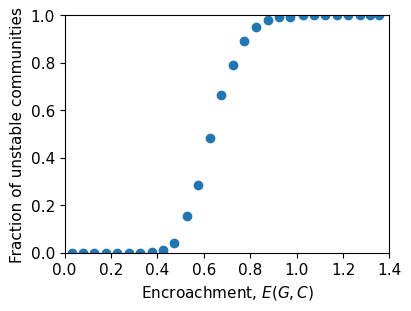

In [27]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,uf_mean, xerr=x_std, yerr= uf_std, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of unstable communities')

Linear supply

In [28]:
unstableLi = (Jnewout[0] > 0).float()
heat_value = torch.zeros(28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(unstable.size(dim=1)):
    for j in range(unstable.size(dim=2)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_value[ii,jj] = (num_point[ii,jj]*heat_value[ii,jj] + unstableLi[k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1


Text(0, 0.5, 'Encroachment, $E(G,C)$')

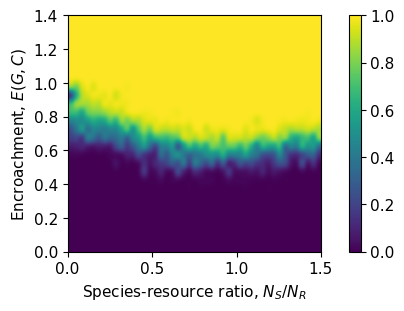

In [29]:
heat_value[:8,:] = torch.ones(heat_value[:8,:].size())
heat_value[8,len(Ns_span)-1] = 1

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_value, extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/E_heat.eps', format='eps')

In [30]:
x_mean = []
ufLi_mean = []
x_std = []
ufLi_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = unstableLi[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufLi_mean.append(torch.mean(y_group))
        ufLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of unstable communities')

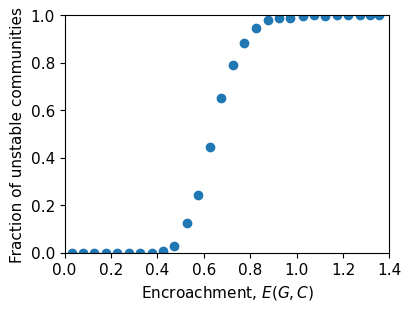

In [31]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,ufLi_mean, xerr=x_std, yerr= ufLi_std, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of unstable communities')

Logistic supply

In [32]:
unstableLo = (Jnewout[1] > 0).float()
heat_value = torch.zeros(28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(unstable.size(dim=1)):
    for j in range(unstable.size(dim=2)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_value[ii,jj] = (num_point[ii,jj]*heat_value[ii,jj] + unstableLo[k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1


Text(0, 0.5, 'Encroachment, $E(G,C)$')

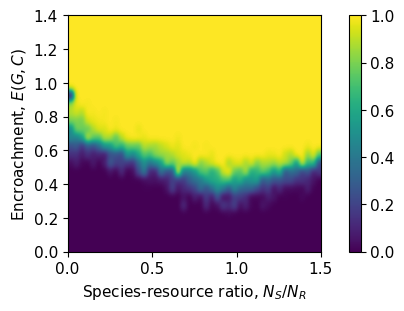

In [33]:
heat_value[:8,:] = torch.ones(heat_value[:8,:].size())
heat_value[8,len(Ns_span)-1] = 1

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_value, extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
#plt.savefig('./figures/E_heat.eps', format='eps')

In [34]:
x_mean = []
ufLo_mean = []
x_std = []
ufLo_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2][indeces]
    y_group = unstableLo[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ufLo_mean.append(torch.mean(y_group))
        ufLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


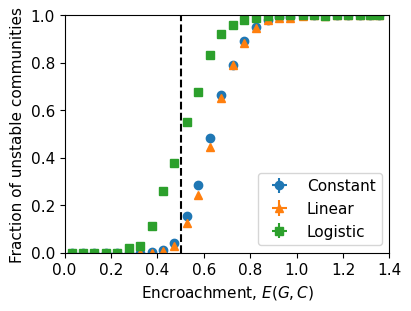

In [35]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,uf_mean, xerr=x_std, yerr= uf_std, marker = 'o', ls='none')
plt.errorbar(x_mean,ufLi_mean, xerr=x_std, yerr= ufLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,ufLo_mean, xerr=x_std, yerr= ufLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(.5,.5, steps=100),torch.linspace(.0,1.0, steps=100),'--k')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of unstable communities')

plt.savefig('./figures/UfvsE.eps', format='eps')

## Surviving fraction

Text(0, 0.5, 'Encroachment, $E(G,C)$')

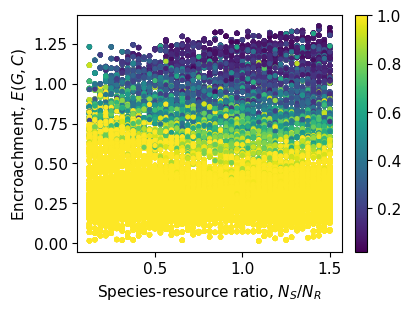

In [36]:
#datapath = Path('./data/Jun9/').expanduser()
datapath = Path('./data/Jun11/').expanduser()
Fractions = (torch.load(datapath/'allFractions')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
Fractions[1][Outputs[0] == 0] = 0 # no fluctuation when stable!

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=Fractions[0], s=8) # color is surviving fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

For linear supply

Text(0, 0.5, 'Encroachment, $E(G,C)$')

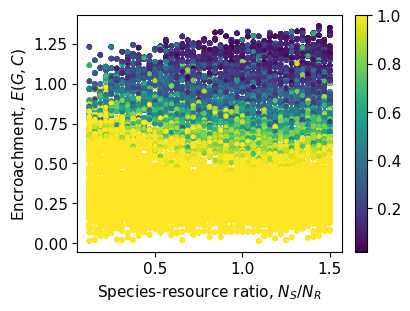

In [37]:
#datapath = Path('./data/Jun9/').expanduser()
datapath = Path('./data/Jun18/').expanduser()
FracLin = (torch.load(datapath/'allFractionsLin')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
FracLin[1][Jnewout[0] == 0] = 0 # no fluctuation when stable!

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=FracLin[0], s=8) # color is surviving fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

For logistic supply

Text(0, 0.5, 'Encroachment, $E(G,C)$')

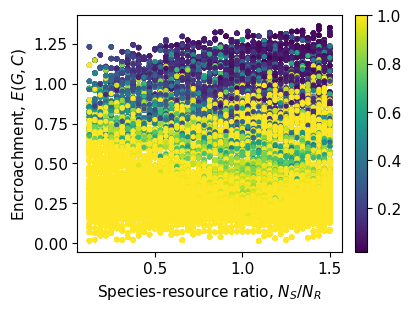

In [38]:
#datapath = Path('./data/Jun9/').expanduser()
datapath = Path('./data/Jun18/').expanduser()
FracLog = (torch.load(datapath/'allFractionsLog')['Fractions']).transpose(0,1).transpose(1,2).transpose(0,3)
# 0: surviving fraction, 1: fluc fraction, 2: alt ss fraction
FracLog[1][Jnewout[1] == 0] = 0 # no fluctuation when stable!

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=FracLog[0], s=8) # color is surviving fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

In [39]:
heat_values = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_values[:,ii,jj] = (num_point[ii,jj]*heat_values[:,ii,jj] + Fractions[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

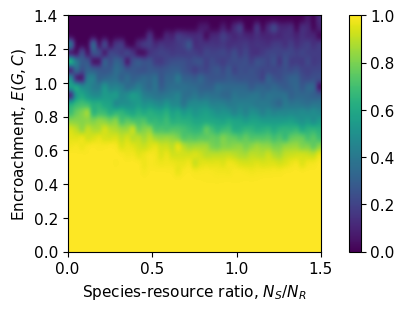

In [40]:
heat_values[0,26:,:] = torch.ones(heat_values[0,26:,:].size())

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[0], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/SurvivalFrac_heat.eps', format='eps')

For linear supply

In [41]:
heat_valLin = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_valLin[:,ii,jj] = (num_point[ii,jj]*heat_valLin[:,ii,jj] + FracLin[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

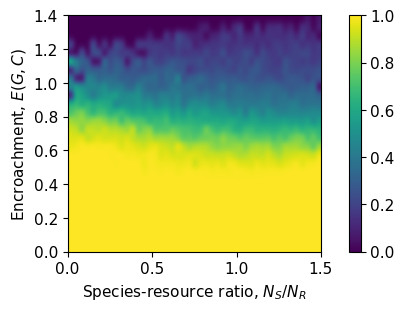

In [42]:
heat_valLin[0,26:,:] = torch.ones(heat_valLin[0,26:,:].size())

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLin[0], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/SurvivalFracLin_heat.eps', format='eps')

For logistic supply

In [43]:
heat_valLog = torch.zeros(3,28,len(Ns_span))
num_point = torch.zeros(28,len(Ns_span))
for i in range(Outputs.size(dim=2)):
    for j in range(Outputs.size(dim=3)):
       for k in range(num_try):
            ii = 27 - int(Outputs[2,k,i,j] * 20)
            #jj = int(NsNr[k,i,j] * Nr / 4) - 1
            jj = int(NsNr[k,i,j] * Nr - 4)
            heat_valLog[:,ii,jj] = (num_point[ii,jj]*heat_valLog[:,ii,jj] + FracLog[:,k,i,j])/(num_point[ii,jj] + 1)
            num_point[ii,jj] = num_point[ii,jj] + 1

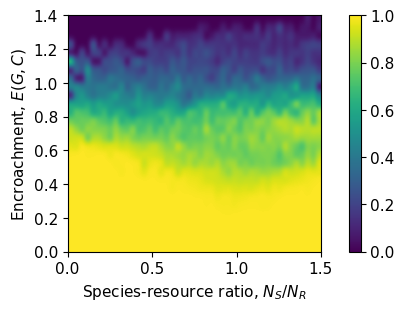

In [44]:
heat_valLog[0,26:,:] = torch.ones(heat_valLog[0,26:,:].size())

extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLog[0], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/SurvivalFracLog_heat.eps', format='eps')

Line graphs

Text(0, 0.5, 'Mean fraction of survival')

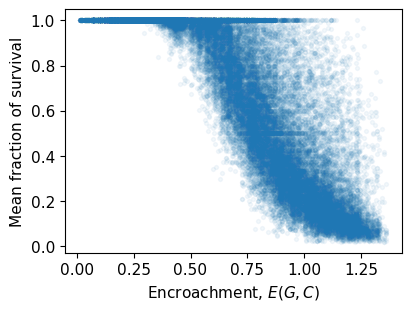

In [45]:
# test

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Outputs[2],Fractions[0], s=8, alpha=0.05) # surviving fraction

plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of survival')

In [103]:
x_mean = []
sur_mean = []
x_std = []
sur_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = Fractions[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        sur_mean.append(torch.mean(y_group))
        sur_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

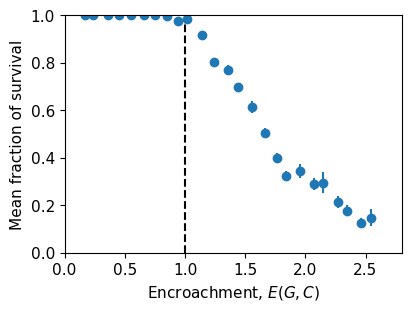

In [107]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(2*torch.tensor(x_mean),sur_mean, xerr=x_std, yerr= sur_std, marker = 'o', ls='none')
plt.plot(torch.linspace(1,1, steps=10),torch.linspace(.0,1.0, steps=10),'--k')
plt.xlim(.0,2.8)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of survival')
#plt.savefig('./figures/SurvivalvsEmain.eps', format='eps')

Linear supply

In [48]:
x_mean = []
surLi_mean = []
x_std = []
surLi_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = FracLin[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLi_mean.append(torch.mean(y_group))
        surLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of survival')

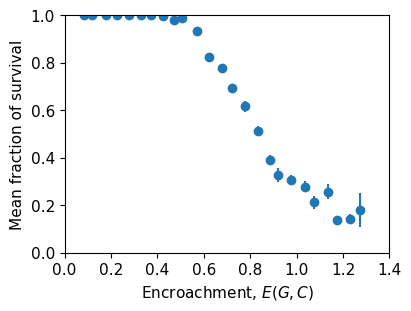

In [49]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,surLi_mean, xerr=x_std, yerr= surLi_std, marker = 'o', ls='none')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of survival')

Logistic supply

In [50]:
x_mean = []
surLo_mean = []
x_std = []
surLo_std = []

for i in range(28):
    #indeces = ((i*0.05<=Outputs[2]) & (Outputs[2]<(i+1)*0.05)).nonzero(as_tuple=True)
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces] # 28 means Ns = Nr
    y_group = FracLog[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLo_mean.append(torch.mean(y_group))
        surLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


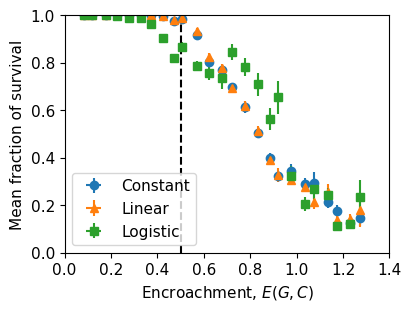

In [51]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,sur_mean, xerr=x_std, yerr= sur_std, marker = 'o', ls='none')
plt.errorbar(x_mean,surLi_mean, xerr=x_std, yerr= surLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,surLo_mean, xerr=x_std, yerr= surLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'],loc='lower left')
plt.plot(torch.linspace(.5,.5, steps=100),torch.linspace(.0,1.0, steps=100),'--k')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of survival')

plt.savefig('./figures/SursvsE.eps', format='eps')

In [52]:
'''
fig, ax1 = plt.subplots(figsize=(4, 3),constrained_layout=True)

color = 'tab:blue'
ax1.set_xlabel('Encroachment, $E(G,C)$')
ax1.set_ylabel('Mean fraction of survival', color=color)
ax1.errorbar(x_mean,sur_mean, xerr=x_std, yerr= sur_std, marker = '^', ls='none',color=color)
ax1.set_ylim(0,1)
ax1.set_xlim(0,1.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Mean fraction of unstable modes of $J$', color=color)  # we already handled the x-label with ax1
ax2.errorbar(x_mean,umJ_mean, xerr=x_std, yerr= umJ_std, marker = 'o', ls='none',color=color)
ax2.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')
ax2.set_ylim(0,1)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig('./figures/FractionsvsE.eps', format='eps')
'''

"\nfig, ax1 = plt.subplots(figsize=(4, 3),constrained_layout=True)\n\ncolor = 'tab:blue'\nax1.set_xlabel('Encroachment, $E(G,C)$')\nax1.set_ylabel('Mean fraction of survival', color=color)\nax1.errorbar(x_mean,sur_mean, xerr=x_std, yerr= sur_std, marker = '^', ls='none',color=color)\nax1.set_ylim(0,1)\nax1.set_xlim(0,1.4)\nax1.tick_params(axis='y', labelcolor=color)\n\nax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\n\ncolor = 'tab:red'\nax2.set_ylabel('Mean fraction of unstable modes of $J$', color=color)  # we already handled the x-label with ax1\nax2.errorbar(x_mean,umJ_mean, xerr=x_std, yerr= umJ_std, marker = 'o', ls='none',color=color)\nax2.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')\nax2.set_ylim(0,1)\nax2.tick_params(axis='y', labelcolor=color)\n\nplt.savefig('./figures/FractionsvsE.eps', format='eps')\n"

Text(0, 0.5, 'Mean fraction of survival')

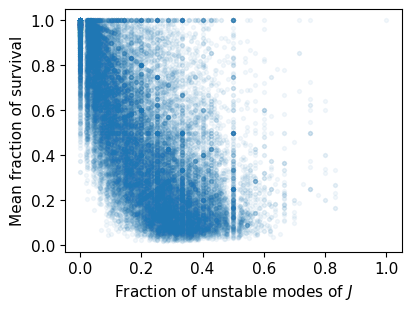

In [53]:
# test
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(Outputs[0],Fractions[0], s=8, alpha=0.05) # surviving fraction

plt.xlabel('Fraction of unstable modes of $J$')
plt.ylabel('Mean fraction of survival')

In [54]:
umJ_mean = []
sur_mean = []
umJ_std = []
sur_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[0,:,28,:]) & (Outputs[0,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[0,:,28,:][indeces]
    y_group = Fractions[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJ_mean.append(torch.mean(x_group))
        umJ_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        sur_mean.append(torch.mean(y_group))
        sur_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of survival')

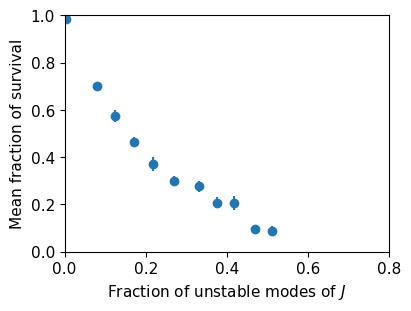

In [55]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(umJ_mean,sur_mean, xerr=umJ_std, yerr= sur_std, marker = 'o', ls='none')

plt.xlim(.0,.8)
plt.ylim(.0,1.0)
plt.xlabel('Fraction of unstable modes of $J$')
plt.ylabel('Mean fraction of survival')
#plt.savefig('./figures/SurFracvsJ.eps', format='eps')

Linear supply

In [56]:
umJLi_mean = []
surLi_mean = []
umJLi_std = []
surLi_std = []

for i in range(28):
    indeces = ((i*0.05<=Jnewout[0,:,28,:]) & (Jnewout[0,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Jnewout[0,:,28,:][indeces]
    y_group = FracLin[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJLi_mean.append(torch.mean(x_group))
        umJLi_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLi_mean.append(torch.mean(y_group))
        surLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of survival')

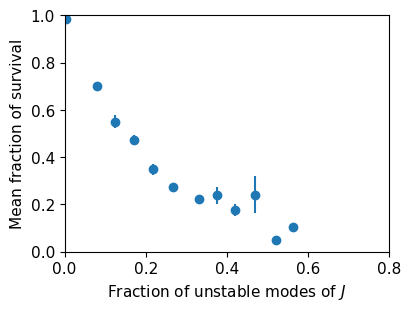

In [57]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(umJLi_mean,surLi_mean, xerr=umJLi_std, yerr= surLi_std, marker = 'o', ls='none')

plt.xlim(.0,.8)
plt.ylim(.0,1.0)
plt.xlabel('Fraction of unstable modes of $J$')
plt.ylabel('Mean fraction of survival')
#plt.savefig('./figures/SurFracvsJ.eps', format='eps')

Logistic supply

In [58]:
umJLo_mean = []
surLo_mean = []
umJLo_std = []
surLo_std = []

for i in range(28):
    indeces = ((i*0.05<=Jnewout[1,:,28,:]) & (Jnewout[1,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Jnewout[1,:,28,:][indeces]
    y_group = FracLog[0,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        umJLo_mean.append(torch.mean(x_group))
        umJLo_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        surLo_mean.append(torch.mean(y_group))
        surLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Mean fraction of survival')

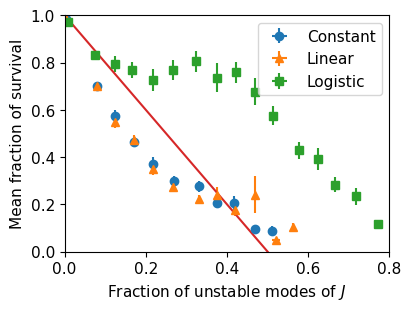

In [59]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(umJ_mean,sur_mean, xerr=umJ_std, yerr= sur_std, marker = 'o', ls='none')
plt.errorbar(umJLi_mean,surLi_mean, xerr=umJLi_std, yerr= surLi_std, marker = '^', ls='none')
plt.errorbar(umJLo_mean,surLo_mean, xerr=umJLo_std, yerr= surLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'])
plt.plot(torch.linspace(0.0,.5, steps=100),torch.linspace(1.0,0.0, steps=100))

plt.xlim(.0,.8)
plt.ylim(.0,1.0)
plt.xlabel('Fraction of unstable modes of $J$')
plt.ylabel('Mean fraction of survival')
#plt.savefig('./figures/SurFracsvsJ.eps', format='eps')

## Fluctuation fraction

Text(0, 0.5, 'Encroachment, $E(G,C)$')

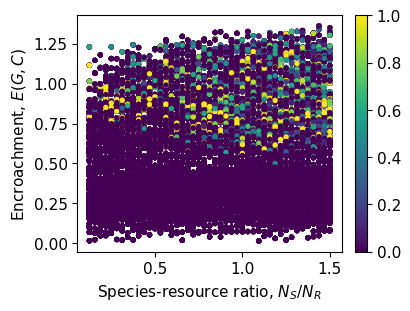

In [60]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=Fractions[1], s=8) # color is fluctuation fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

Linear supply

Text(0, 0.5, 'Encroachment, $E(G,C)$')

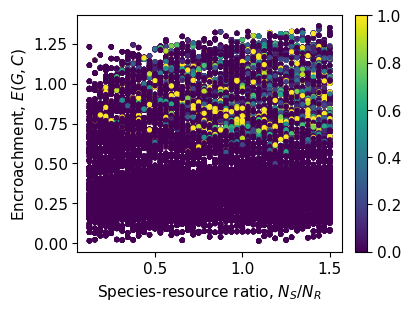

In [61]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=FracLin[1], s=8) # color is fluctuation fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

Logistic supply

Text(0, 0.5, 'Encroachment, $E(G,C)$')

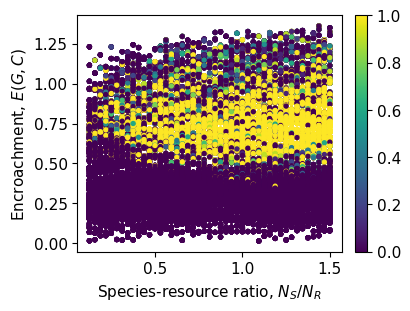

In [62]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=FracLog[1], s=8) # color is fluctuation fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

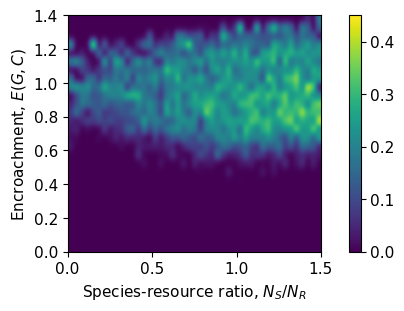

In [63]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[1], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

plt.savefig('./figures/Fluc_heat.eps', format='eps')

Linear supply

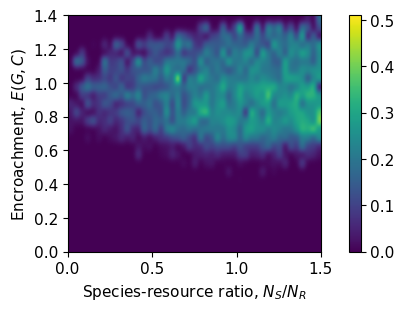

In [64]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLin[1], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

plt.savefig('./figures/FlucLin_heat.eps', format='eps')

Logistic supply

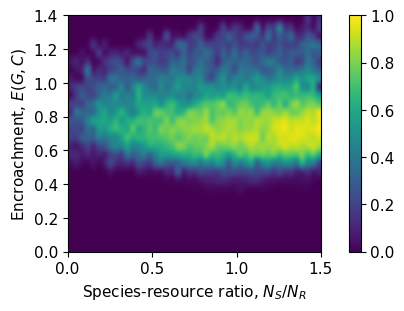

In [65]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLog[1], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

plt.savefig('./figures/FlucLog_heat.eps', format='eps')

Fluctuation fraction vs. $E(G,C)$

In [66]:
x_mean = []
fl_mean = []
x_std = []
fl_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = Fractions[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        fl_mean.append(torch.mean(y_group))
        fl_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of fluctuation')

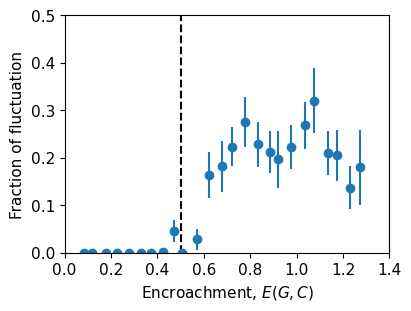

In [67]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,fl_mean, xerr=x_std, yerr= fl_std, marker = 'o', ls='none')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,.5)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of fluctuation')

#plt.savefig('./figures/FlucvsE.eps', format='eps')

Linear supply

In [68]:
x_mean = []
flLi_mean = []
x_std = []
flLi_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLin[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        flLi_mean.append(torch.mean(y_group))
        flLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of fluctuation')

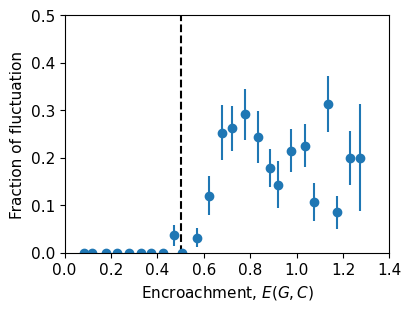

In [69]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,flLi_mean, xerr=x_std, yerr= flLi_std, marker = 'o', ls='none')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,.5)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of fluctuation')

#plt.savefig('./figures/FlucvsE.eps', format='eps')

In [70]:
x_mean = []
flLo_mean = []
x_std = []
flLo_std = []

#mod_fluc_frac = Fractions[1]
#mod_fluc_frac[Outputs[0] == 0] = 0 # no fluctuation when stable!

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLog[1,:,28,:][indeces]
    #y_group = mod_fluc_frac[indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        flLo_mean.append(torch.mean(y_group))
        flLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


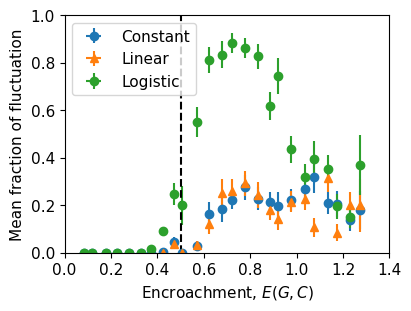

In [71]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,fl_mean, xerr=x_std, yerr= fl_std, marker = 'o', ls='none')
plt.errorbar(x_mean,flLi_mean, xerr=x_std, yerr= flLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,flLo_mean, xerr=x_std, yerr= flLo_std, marker = 'o', ls='none')
plt.legend(['Constant','Linear','Logistic'],loc='upper left')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Mean fraction of fluctuation')

plt.savefig('./figures/FlucsvsE.eps', format='eps')

## Aternative stable state fractions

Text(0, 0.5, 'Encroachment, $E(G,C)$')

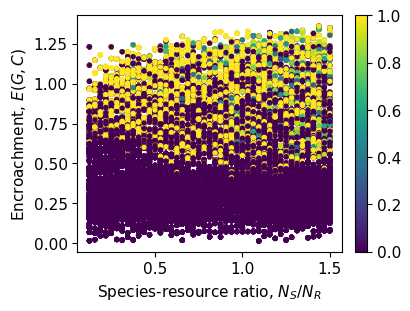

In [72]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.scatter(NsNr,Outputs[2],c=Fractions[2], s=8) # color is Alt ss fraction
plt.colorbar()

plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')

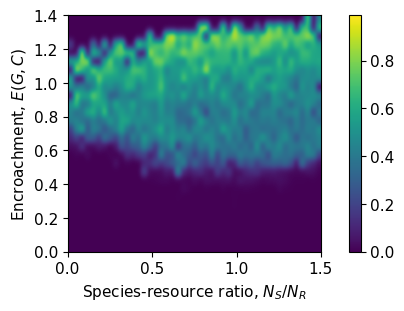

In [73]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_values[2], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/Alt_heat.eps', format='eps')

Linear supply

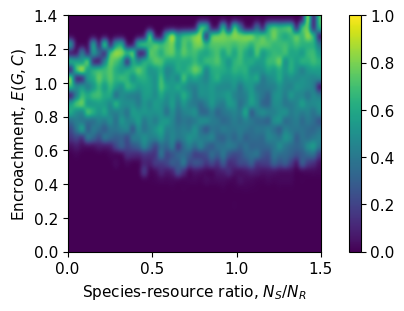

In [74]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLin[2], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/AltLin_heat.eps', format='eps')

Logistic supply

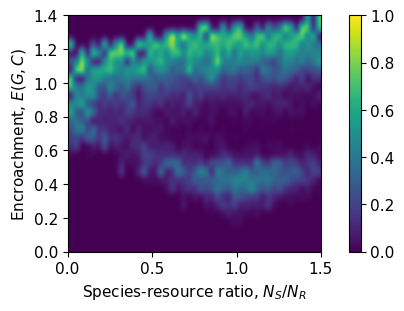

In [75]:
extent = .0, 1.5, .0, 1.4
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.imshow(heat_valLog[2], extent = extent, interpolation='gaussian')
plt.colorbar()
plt.xlabel('Species-resource ratio, $N_S/N_R$')
plt.ylabel('Encroachment, $E(G,C)$')
plt.savefig('./figures/AltLog_heat.eps', format='eps')

Alt SS vs. $E(G,C)$

In [76]:
x_mean = []
ms_mean = []
x_std = []
ms_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = Fractions[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        ms_mean.append(torch.mean(y_group))
        ms_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of multiple steady states')

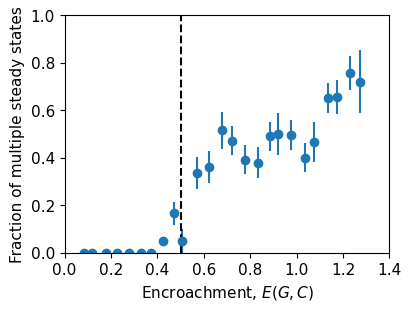

In [77]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,ms_mean, xerr=x_std, yerr= ms_std, marker = 'o', ls='none')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of multiple steady states')
#plt.savefig('./figures/AltAndFlucvsE.eps', format='eps')

In [78]:
x_mean = []
msLi_mean = []
x_std = []
msLi_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLin[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        msLi_mean.append(torch.mean(y_group))
        msLi_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

Text(0, 0.5, 'Fraction of multiple steady states')

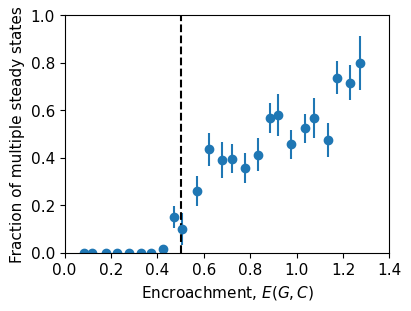

In [79]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,msLi_mean, xerr=x_std, yerr= msLi_std, marker = 'o', ls='none')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of multiple steady states')
#plt.savefig('./figures/AltAndFlucvsE.eps', format='eps')

In [80]:
x_mean = []
msLo_mean = []
x_std = []
msLo_std = []

for i in range(28):
    indeces = ((i*0.05<=Outputs[2,:,28,:]) & (Outputs[2,:,28,:]<(i+1)*0.05)).nonzero(as_tuple=True)
    x_group = Outputs[2,:,28,:][indeces]
    y_group = FracLog[2,:,28,:][indeces]
    if x_group.size() != torch.Size([0]):
        x_mean.append(torch.mean(x_group))
        x_std.append(torch.std(x_group)/math.sqrt(len(indeces[0])))
        msLo_mean.append(torch.mean(y_group))
        msLo_std.append(torch.std(y_group)/math.sqrt(len(indeces[0])))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


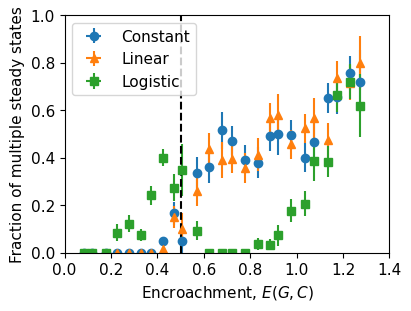

In [81]:
plt.figure(figsize=(4, 3),constrained_layout=True)
plt.errorbar(x_mean,ms_mean, xerr=x_std, yerr= ms_std, marker = 'o', ls='none')
plt.errorbar(x_mean,msLi_mean, xerr=x_std, yerr= msLi_std, marker = '^', ls='none')
plt.errorbar(x_mean,msLo_mean, xerr=x_std, yerr= msLo_std, marker = 's', ls='none')
plt.legend(['Constant','Linear','Logistic'],loc='upper left')
plt.plot(torch.linspace(0.5, 0.5, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.xlim(.0,1.4)
plt.ylim(.0,1.0)
plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fraction of multiple steady states')
plt.savefig('./figures/MulSteadyvsE.eps', format='eps')

All fractions for const supply

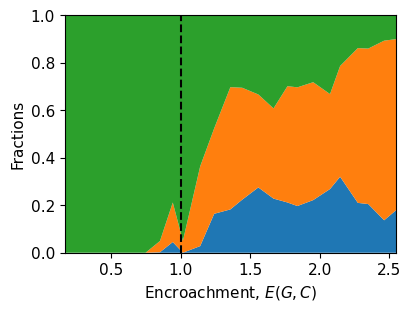

In [97]:
gs_mean = []

for i in range(len(x_mean)):
    gs_mean.append(1 - fl_mean[i] - ms_mean[i])
    #x_mean[i] = 2*x_mean[i]

plt.figure(figsize=(4, 3),constrained_layout=True)
plt.stackplot(x_mean,fl_mean, ms_mean, gs_mean)
plt.plot(torch.linspace(1, 1, steps=10),torch.linspace(0.0, 1.0, steps=10),'k--')

plt.ylim(0,1)
plt.xlim(x_mean[0],x_mean[-1])

plt.xlabel('Encroachment, $E(G,C)$')
plt.ylabel('Fractions')
plt.savefig('./figures/StackFrac.eps', format='eps')